<a href="https://colab.research.google.com/github/dercodeKoenig/colab-KI/blob/main/gan-TPU-DI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

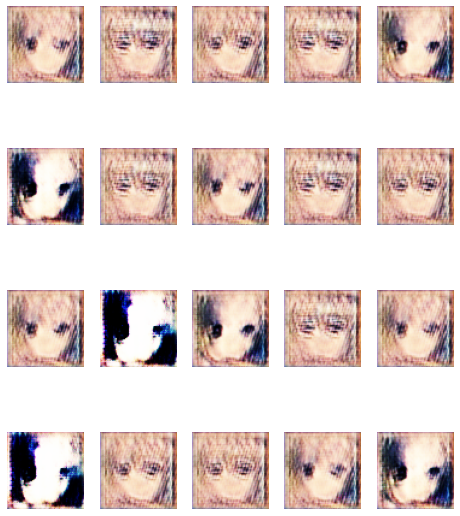

Time for epoch 1 is 22.66460609436035 sec


In [ ]:
%cd /content/drive/MyDrive/
!rm -r outputs

#!apt-get update -y
#!apt-get install libgl-dev -y
#!pip install tensorflow opencv-python numpy
import os
from tensorflow.python.profiler import profiler_client
tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import numpy as np
import os
from tensorflow.keras import layers
import time
import cv2
from IPython import display

try:
  train_images_cartoon = np.load("npfile.npy")
except:
  %cd /content
  !git clone https://github.com/dercodeKoenig/cartoon-faces.git
  train_images_cartoon = []
  z=0
  total = len(os.listdir("cartoon-faces"))
  max=512*100
  files = os.listdir("cartoon-faces")
  while(True):
    if(z>=max):
      break
    z+=1
    print("\r" + str(z) + " / " + str(51200),end="")
    try:
      img = cv2.imread("cartoon-faces/"+files[z])
      img1 = img.copy()
      img2 = cv2.resize(img1, (64,64))
      train_images_cartoon.append(img2)
    except:
      print("error: ")
      try:
        print(" cartoon-faces/"+files[z])
      except:
        pass
      max+=1

  print("")

  train_images_cartoon = np.array(train_images_cartoon,dtype=object)


  train_images_cartoon = train_images_cartoon.reshape(train_images_cartoon.shape[0], 64, 64, 3).astype('float32')
  train_images_cartoon = (train_images_cartoon - 127.5) / 127.5  # Normalize the images to [-1, 1]
  %cd /content/drive/MyDrive/
  np.save("npfile", train_images_cartoon)

print(train_images_cartoon.shape)
train_images_cartoon1=train_images_cartoon[0:int(1*train_images_cartoon.shape[0]/4)]
train_images_cartoon2=train_images_cartoon[int(1*train_images_cartoon.shape[0]/4):int(2*train_images_cartoon.shape[0]/4)]
train_images_cartoon3=train_images_cartoon[int(2*train_images_cartoon.shape[0]/4):int(3*train_images_cartoon.shape[0]/4)]
train_images_cartoon4=train_images_cartoon[int(3*train_images_cartoon.shape[0]/4):int(4*train_images_cartoon.shape[0]/4)]
print(train_images_cartoon1.shape)
print(train_images_cartoon2.shape)
print(train_images_cartoon3.shape)
print(train_images_cartoon4.shape)


print("All devices: ", tf.config.list_logical_devices('TPU'))
BATCH_SIZE_PER_REPLICA = 64
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * 8 #8TPUs


resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

train_images_cartoon1 = tf.data.Dataset.from_tensor_slices((train_images_cartoon1)).batch(GLOBAL_BATCH_SIZE)  
train_images_cartoon2 = tf.data.Dataset.from_tensor_slices((train_images_cartoon2)).batch(GLOBAL_BATCH_SIZE) 
train_images_cartoon3 = tf.data.Dataset.from_tensor_slices((train_images_cartoon3)).batch(GLOBAL_BATCH_SIZE) 
train_images_cartoon4 = tf.data.Dataset.from_tensor_slices((train_images_cartoon4)).batch(GLOBAL_BATCH_SIZE) 
train_images_cartoon1 = strategy.experimental_distribute_dataset(train_images_cartoon1)
train_images_cartoon2 = strategy.experimental_distribute_dataset(train_images_cartoon2)
train_images_cartoon3 = strategy.experimental_distribute_dataset(train_images_cartoon3)
train_images_cartoon4 = strategy.experimental_distribute_dataset(train_images_cartoon4)



del train_images_cartoon
#display.clear_output()

print ('Number of devices: {}'.format(strategy.num_replicas_in_sync))

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(100)))

    model.add(layers.Dense(8*8*82,use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)
    
    model.add(layers.Reshape((8,8,82)))
    print(model.output_shape)


    
    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)


    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)



    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1),padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)

    
    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)


    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)



    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2),padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)

    
    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)


    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)



    model.add(layers.Conv2DTranspose(128, (5, 5),padding="same", strides=(2, 2), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)
    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)


    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)


    
    model.add(layers.Conv2DTranspose(128, (5, 5),padding="same", strides=(2, 2), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)
    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)


    model.add(layers.Conv2D(128, 5,padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    print(model.output_shape)

    model.add(layers.Conv2DTranspose(3,5,padding="same",strides=(1, 1), activation='tanh', use_bias=False))


    return model


def make_discriminator_model():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Input(shape=(64,64,3)))
    print(model.output_shape)

    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Conv2D(128, (5, 5), strides=(1, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Conv2D(128, (5, 5), strides=(1, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Conv2D(256, (5, 5), strides=(1, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Conv2D(512, (5, 5), strides=(1, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Flatten())

    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    print(model.output_shape)

    model.add(layers.Dense(1,activation="sigmoid"))

    return model

with strategy.scope():
  # Set reduction to `none` so we can do the reduction afterwards and divide by
  # global batch size.
  cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False,reduction=tf.keras.losses.Reduction.NONE)
      

  def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    #print("disc_loss:",total_loss)
    return tf.nn.compute_average_loss(total_loss, global_batch_size=GLOBAL_BATCH_SIZE)
  
  def generator_loss(fake_output):
    total_loss=cross_entropy(tf.ones_like(fake_output), fake_output)
    #print("gen_loss:",total_loss)
    return tf.nn.compute_average_loss(total_loss, global_batch_size=GLOBAL_BATCH_SIZE)

# model, optimizer, and checkpoint must be created under `strategy.scope`.
with strategy.scope():
  discriminator = make_discriminator_model()
  generator = make_generator_model()
  generator_optimizer = tf.keras.optimizers.Adam(0.00001)
  discriminator_optimizer = tf.keras.optimizers.Adam(0.00002)

  @tf.function
  def train_step(images):
    noise = tf.random.normal([BATCH_SIZE_PER_REPLICA, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    print(gen_loss,disc_loss)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

display.clear_output()

seed = tf.random.normal([20, 100])
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    zzz=0
    for image_batch in dataset:
      zzz+=1
      strategy.run(train_step, args=(image_batch,))

      if(zzz==10):
        zzz=0
        generate_images(generator,epoch + 1,seed)

    
    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

def generate_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  generated_images = np.array(predictions,dtype= 'float32')
  generated_images = (generated_images+1)*127.5
  cz=0

  heighest = 0
  while(True):
      heighest +=1
      if(os.path.exists("outputs/0/"+str(heighest)+".jpg")==False):
        break

  fig = plt.figure(figsize=(8, 10))
  for i in generated_images:
    #print(np.array(i,dtype= 'int32'))
    plt.subplot(4, 5, cz+1)
    plt.imshow(np.array(cv2.cvtColor(i, cv2.COLOR_BGR2RGB),dtype= 'int32'))
    plt.axis('off')
    cv2.imwrite("outputs/"+str(cz)+"/"+str(heighest)+".jpg",i)
    cz+=1
  display.clear_output(wait=True)
  plt.show()

os.system("mkdir outputs")
for i in range(20):
  os.system("mkdir outputs/"+str(i))


try:
  generator.load_weights('gen_weights.h5')
  discriminator.load_weights('disc_weights.h5')
except:
  print("no weights")

for i in range(10000):
  train(train_images_cartoon1, 1)
  train(train_images_cartoon2, 1)
  train(train_images_cartoon3, 1)
  train(train_images_cartoon4, 1)
  if(i%10==0):
    print("save chkp")
    generator.save_weights('gen_weights.h5', overwrite=True)
    discriminator.save_weights('disc_weights.h5', overwrite=True)

